In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random

#open the file
datapath='/Users/rachellee/Desktop/research/references/'
filename='flux_table_70um.txt'
data=np.loadtxt(datapath+filename)

#number is coloumn 0, flux is column 25
number=data[:,0]
flux=data[:,25]

In [2]:
#remove zeros in the flux
flux_new=[]
for i in range(len(flux)):
    if flux[i]!=0:
        flux_new.append(flux[i])

In [3]:
#assign a star a random value from the fluxes 
cluster_flux=[]
star=[]
cluster_size=2000
for i in range(cluster_size):
    cluster_flux.append(random.choice(flux_new))
    star.append(i)

In [4]:
#convert flux to mag
cluster_mag=[]
for i in range(len(cluster_flux)):
    mag=-2.5*np.log10(cluster_flux[i])
    cluster_mag.append(mag)

In [6]:
def my_probability(burst,bins,duration):
    prob=(1/(2*bins))/((burst-((burst-1)/(2*bins))))/duration
    return prob

In [7]:
#make multi dimensional array for burst prob 
#let 1 be unburst and NaN be burst
t=300 #yrs
cadence=2
steps=t*cadence
burst_prob100=my_probability(100,6,100)/cadence
burst_prob40=my_probability(40,6,40)/cadence
burst_prob16=my_probability(16,6,16)/cadence
burst_prob6=my_probability(6.3,6,6.3)/cadence
burst_prob3=my_probability(3.2,6,3.2)/cadence
burst_prob1=my_probability(1.6,6,1.6)/cadence
burst=np.ones((cluster_size,steps))
L=np.zeros((cluster_size,steps))

In [8]:
#set up a loop that sets the star that bursts to NaN for 100 years
cluster_new=[]
cluster_old=[]
star_new=[]
star_old=[]
for i in range(steps):
    for j in range(cluster_size):
        if burst[j,i]==1:
            prob=random.random()
            if prob>burst_prob1:
                burst[j,i]=burst[j,i]
                L[j,i]=cluster_mag[j]
            elif prob<=burst_prob1 and prob>burst_prob3:
                burst[j,i:3+i]=np.nan
                L[j,i:3+i]=cluster_mag[j]-0.5
                cluster_new.append(cluster_mag[j]-0.5)
                cluster_old.append(cluster_mag[j])
                star_new.append(star[j])
                star_old.append(star[j])
            elif prob<=burst_prob3 and prob>burst_prob6:
                burst[j,i:6+i]=np.nan
                L[j,i:6+i]=cluster_mag[j]-1.25
                cluster_new.append(cluster_mag[j]-1.25)
                cluster_old.append(cluster_mag[j])
                star_new.append(star[j])
                star_old.append(star[j])
            elif prob<=burst_prob6 and prob>burst_prob16:
                burst[j,i:13+i]=np.nan
                L[j,i:13+i]=cluster_mag[j]-2
                cluster_new.append(cluster_mag[j]-2)
                cluster_old.append(cluster_mag[j])
                star_new.append(star[j])
                star_old.append(star[j])
            elif prob<=burst_prob16 and prob>burst_prob40:
                burst[j,i:32+i]=np.nan
                L[j,i:32+i]=cluster_mag[j]-3
                cluster_new.append(cluster_mag[j]-3)
                cluster_old.append(cluster_mag[j])
                star_new.append(star[j])
                star_old.append(star[j])
            elif prob<=burst_prob40 and prob>burst_prob100:
                burst[j,i:80+i]=np.nan
                L[j,i:80+i]=cluster_mag[j]-4
                cluster_new.append(cluster_mag[j]-4)
                cluster_old.append(cluster_mag[j])
                star_new.append(star[j])
                star_old.append(star[j])
            elif prob<=burst_prob100:
                burst[j,i:200+i]=np.nan
                L[j,i:200+i]=cluster_mag[j]-5
                cluster_new.append(cluster_mag[j]-5)
                cluster_old.append(cluster_mag[j])
                star_new.append(star[j])
                star_old.append(star[j])

In [9]:
#determine total number of bursts 
total=0
burst_total=[]
for i in range(steps):
    for j in range(cluster_size):
        if np.isnan(burst[j,i])==True and burst[j,i-1]==1:
                total+=1
    burst_total.append(total)

In [10]:
#find the fraction at a time
burst_fraction=[]
fraction_val=0
for i in range(steps):
    for j in range(cluster_size):
        if np.isnan(burst[j,i])==True:
            fraction_val+=1
    burst_fraction.append(fraction_val)
    fraction_val=0

In [11]:
fraction=[]
for i in range(len(burst_fraction)):
    fraction.append(burst_fraction[i]/cluster_size)

Text(0.5, 1.0, 'Fraction of protostars that have undergone a burst')

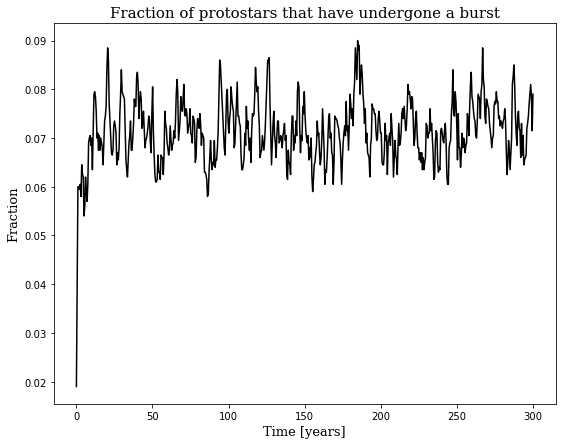

In [12]:
time=np.linspace(0,t,steps)
text="t={} years".format(t)
title='Fraction of protostars that have undergone a burst'
fig,ax=plt.subplots(1,1)
fig.set_size_inches(9,7)
ax.plot(time,fraction,color='black')
ax.set_xlabel('Time [years]',font='serif',fontsize=13)
ax.set_ylabel('Fraction',font='serif',fontsize=13)
ax.set_title(title,font='serif',fontsize=15)
#ax.text(t,0,text,font='serif',fontsize=12,ha='right')
#plt.savefig('/Users/rachellee/Desktop/fraction_will_bins.jpeg',dpi=300)

In [13]:
#find number of 3x, 10x, 30x, and 100x burst 
#determine total number of bursts 
total1=0
total3=0
total6=0
total16=0
total40=0
total100=0
burst_total1=[]
burst_total3=[]
burst_total6=[]
burst_total16=[]
burst_total40=[]
burst_total100=[]
for i in range(steps):
    for j in range(cluster_size):
        if np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-0.5:
            total1+=1
        elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-1.25:
            total3+=1
        elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-2:
            total6+=1
        elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-3:
            total16+=1
        elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-4:
            total40+=1
        elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-5.0:
            total100+=1
    burst_total1.append(total1)
    burst_total3.append(total3)
    burst_total6.append(total6)
    burst_total16.append(total16)
    burst_total40.append(total40)
    burst_total100.append(total100)

In [14]:
burst_frac1=[]
frac_val1=0
burst_frac3=[]
frac_val3=0
burst_frac6=[]
frac_val6=0
burst_frac16=[]
frac_val16=0
burst_frac40=[]
frac_val40=0
burst_frac100=[]
frac_val100=0
for i in range(steps):
    for j in range(cluster_size):
        if np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-0.5:
            frac_val1+=1
        elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-1.25:
            frac_val3+=1
        elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-2:
            frac_val6+=1
        elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-3:
            frac_val16+=1
        elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-4:
            frac_val40+=1
        elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-5.0:
            frac_val100+=1
    burst_frac1.append(frac_val1)
    frac_val1=0
    burst_frac3.append(frac_val3)
    frac_val3=0 
    burst_frac6.append(frac_val6)
    frac_val6=0
    burst_frac16.append(frac_val16)
    frac_val16=0
    burst_frac40.append(frac_val40)
    frac_val40=0
    burst_frac100.append(frac_val100)
    frac_val100=0 

In [16]:
fraction1=[]
fraction3=[]
fraction6=[]
fraction16=[]
fraction40=[]
fraction100=[]
for i in range(len(burst_frac100)):
    fraction1.append(burst_frac1[i]/cluster_size)
    fraction3.append(burst_frac3[i]/cluster_size)
    fraction6.append(burst_frac6[i]/cluster_size)
    fraction16.append(burst_frac16[i]/cluster_size)
    fraction40.append(burst_frac40[i]/cluster_size)
    fraction100.append(burst_frac100[i]/cluster_size)

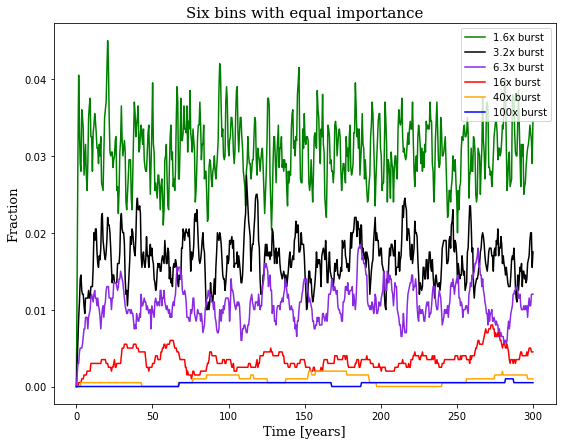

In [21]:
time=np.linspace(0,t,steps)
title='Six bins with equal importance'
fig,ax=plt.subplots(1,1)
fig.set_size_inches(9,7)
ax.plot(time,fraction1,color='green',label='1.6x burst')
ax.plot(time,fraction3,color='black',label='3.2x burst')
ax.plot(time,fraction6,color='blueviolet',label='6.3x burst')
ax.plot(time,fraction16,color='red',label='16x burst')
ax.plot(time,fraction40,color='orange',label='40x burst')
ax.plot(time,fraction100,color='blue',label='100x burst')
ax.set_xlabel('Time [years]',font='serif',fontsize=13)
ax.set_ylabel('Fraction',font='serif',fontsize=13)
ax.set_title(title,font='serif',fontsize=15)
plt.legend(loc='upper right')
#plt.savefig('/Users/rachellee/Desktop/will_burst_comparison.jpeg',dpi=300)

Text(0.5, 1.0, 'Five bins with equal importance, 100x burst')

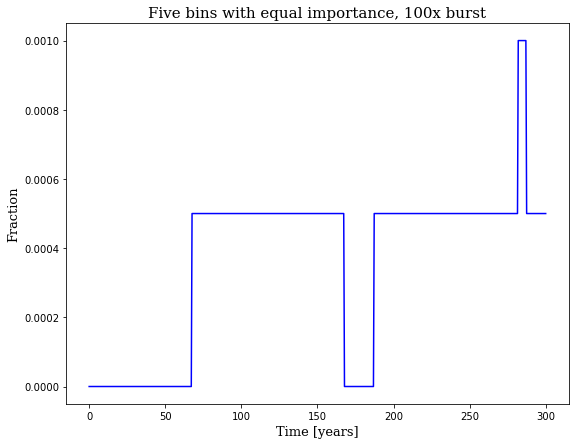

In [20]:
time=np.linspace(0,t,steps)
title='Five bins with equal importance, 100x burst'
fig,ax=plt.subplots(1,1)
fig.set_size_inches(9,7)
ax.plot(time,fraction100,color='blue',label='100x burst')
ax.set_xlabel('Time [years]',font='serif',fontsize=13)
ax.set_ylabel('Fraction',font='serif',fontsize=13)
ax.set_title(title,font='serif',fontsize=15)